# Birthday "Paradox"

If given a group of people `n` sized, where `n>=2`, what are the odds of 2 individuals sharing a birthday?

This can be rewritten as "choose n from 365, what are the odds that 2 match?". 

Working from the inverse, the question is "when given n people, what are the odds that none of them share a birthday". 

The probability of any 2 people not sharing the same birthday is `364 / 365`. This probability for an entire room of people can be determined by raising `(364 / 365)` to the power of the total pairs of people in the room: `C(n,2)`. This can be simplified as `(364 / 365) ^ (0.5 * n * (n - 1))`.

The probability of the opposite happening, our original question, can be expressed 1 - the above probability.

The python implementation of this can be seen below

In [1]:
n = 23 # number of people 
# 23 people = ~50% chance

probability = 1 - ((364 / 365) ** (.5 * n * (n - 1)))
probability *= 100

print(f"Probability of 2 people sharing a birthday in a group of {n} is {round(probability, 3)}%")

Probability of 2 people sharing a birthday in a group of 23 is 50.048%


The probability of people sharing a birthday as n increases can be seen in the following graph. The blue line represents the mathematically predicted chance.

The bar chart represents the percent of simulations that had people that shared a birthday.

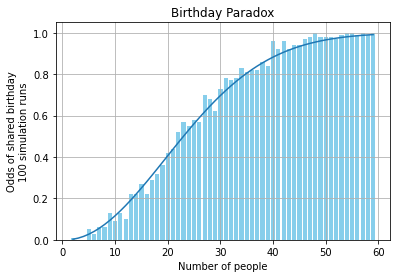

In [3]:
maxX = 60 # how wide the graph is

xCalc = []
yCalc = []
# Predicted Chance
for i in range(2, maxX):
    yCalc.append(1 - ((364 / 365) ** (.5 * i * (i - 1))))
    xCalc.append(i)

simRuns = 100
import random, secrets
random.seed(secrets.randbits(100))
# Simulated Chance
ySim = []
for i in range(2, maxX): # number of people in simulation
    times = 0 # number of times that the simulation has been true
    for j in range(0, simRuns): # each simulation run
        birthdays = []
        for x in range(0, i): # each person in the simulation run
            # choose a random integer between 1 and 365
            day = random.randint(1, 365)
            if day in birthdays:
                times += 1
                break
            else:
                birthdays.append(day)
    ySim.append(times / simRuns)

# Graph Creation
import matplotlib.pyplot as plt
plt.title("Birthday Paradox")
plt.xlabel("Number of people")
plt.ylabel(f"Odds of shared birthday\n{simRuns} simulation runs")
plt.plot(xCalc, yCalc) # line
plt.bar(xCalc, ySim, color="skyblue")
plt.show()

<b>As you can see, you only need about ~20 people to achieve a 50% probability (23 people will give you a 50.048% chance)</b>